In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataframe

In [28]:
df = pd.read_csv('data_E1.csv')
df.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,2008,1,1,29.63,NaN,NaN
1,2008,1,2,21.46,NaN,NaN
2,2008,1,3,24.25,NaN,NaN
3,2008,1,4,29.04,NaN,NaN
4,2008,1,5,30.17,NaN,NaN


In [29]:
df.describe()

,Year,Month,Day,O3,PM2.5
count,2984.000000,2984.000000,2984.000000,2878.000000,2725.000000
mean,2011.592493,6.419236,15.715818,16.313767,28.814594
std,2.357040,3.487660,8.804066,7.995680,17.479388
min,2008.000000,1.000000,1.000000,1.000000,5.000000
25%,2010.000000,3.000000,8.000000,9.392500,16.170000
50%,2012.000000,6.000000,16.000000,16.960000,23.210000
75%,2014.000000,9.000000,23.000000,22.357500,37.210000
max,2016.000000,12.000000,31.000000,56.300000,126.200000


# Misión 1

## Buscamos los datos extremos

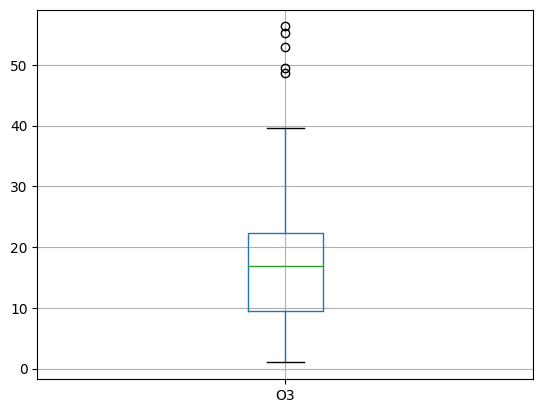

In [30]:
df.boxplot(column = 'O3')
plt.show()

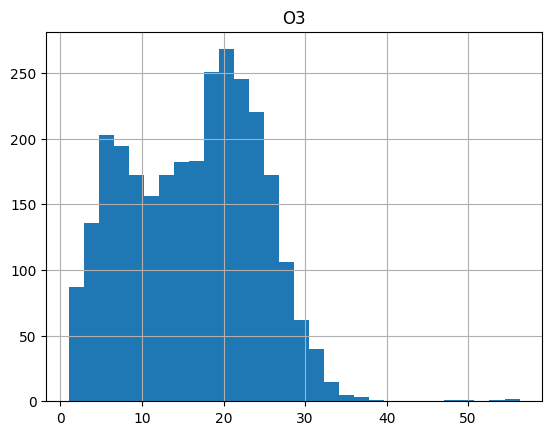

In [31]:
df.hist(column='O3', bins=30)
plt.show()

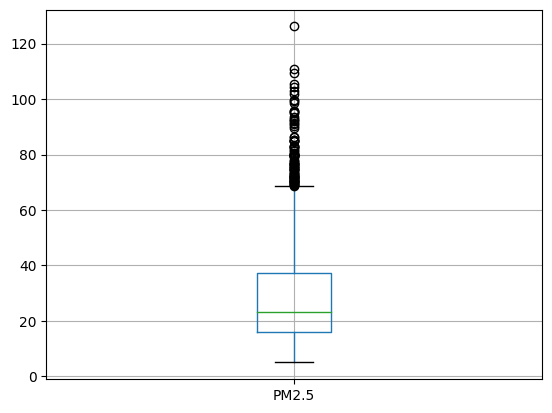

In [32]:
df.boxplot(column = 'PM2.5')

plt.show()

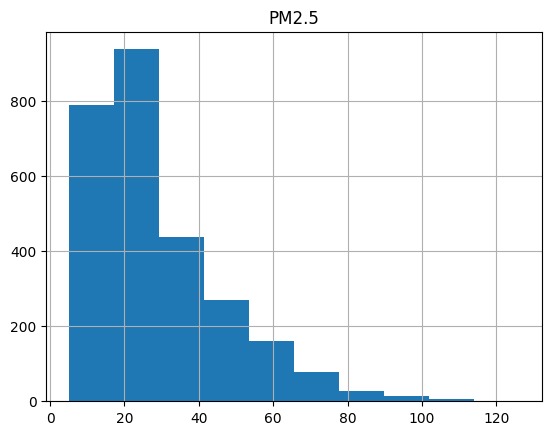

In [33]:
df.hist(column='PM2.5')
plt.show()

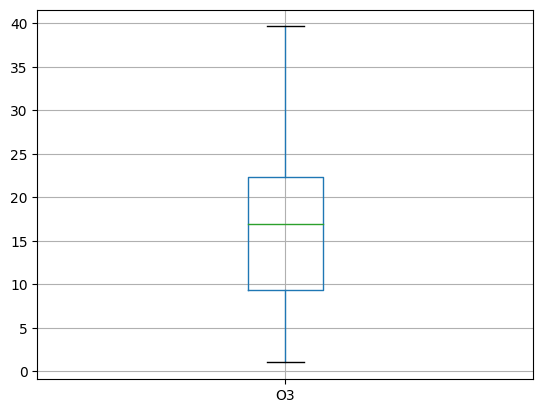

In [34]:
# Los corregimos
df_filtrado = df[df['O3'] < 40]
df_filtrado.boxplot(column = 'O3')
plt.show()

<ipython-input-35-24be8082a522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PM2.5'] = np.log(df['PM2.5'])


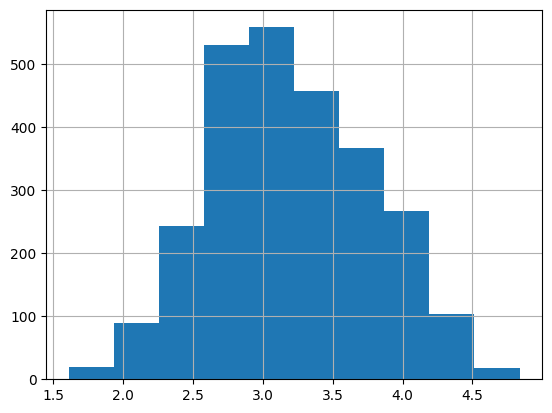

In [35]:
df_filtrado['PM2.5'] = np.log(df['PM2.5'])
df_filtrado['PM2.5'].hist()
plt.show()

## Buscamos los valores nulos

In [36]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

In [37]:
# Datos arreglados
df_arreglados = df_filtrado.copy()
df_arreglados['O3'] = df['O3'].fillna(df['O3'].mean())
df_arreglados['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())
print(df_arreglados.shape)

(2873, 6)


In [38]:
# Datos eliminados
df_eliminados = df_filtrado.dropna()
print(df_eliminados.shape)

(2651, 6)


# Misión 2

In [39]:
indicadores = {
    # 03
    'Media O3': [df_arreglados['O3'].mean()],
    'Desviación Estándar O3': [df_arreglados['O3'].std()],
    'Máximo O3': [df_arreglados['O3'].max()],
    'Mínimo O3': [df_arreglados['O3'].min()],
    'Kurtosis O3': [df_arreglados['O3'].kurtosis()],
    # PM 2.5
    'Media PM2.5': [df_arreglados['PM2.5'].mean()],
    'Desviación Estándar PM2.5': [df_arreglados['PM2.5'].std()],
    'Máximo PM2.5': [df_arreglados['PM2.5'].max()],
    'Mínimo PM2.5': [df_arreglados['PM2.5'].min()],
    'Kurtosis PM2.5': [df_arreglados['PM2.5'].kurtosis()]
}

correlation = df_arreglados['O3'].corr(df_arreglados['PM2.5'])

indicators_df = pd.DataFrame.from_dict(indicadores)

indicators_df['Correlación'] = correlation

indicators_df.head()

,Media O3,Desviación Estándar O3,Máximo O3,Mínimo O3,Kurtosis O3,Media PM2.5,Desviación Estándar PM2.5,Máximo PM2.5,Mínimo PM2.5,Kurtosis PM2.5,Correlación
0,16.250821,7.857782,39.65,1.0,-0.944356,28.950613,16.868082,126.2,5.0,2.354072,-0.478362


In [40]:
indicadores = {
    # 03
    'Media O3': [df_eliminados['O3'].mean()],
    'Desviación Estándar O3': [df_eliminados['O3'].std()],
    'Máximo O3': [df_eliminados['O3'].max()],
    'Mínimo O3': [df_eliminados['O3'].min()],
    'Kurtosis O3': [df_eliminados['O3'].kurtosis()],
    # PM 2.5
    'Media PM2.5': [df_eliminados['PM2.5'].mean()],
    'Desviación Estándar PM2.5': [df_eliminados['PM2.5'].std()],
    'Máximo PM2.5': [df_eliminados['PM2.5'].max()],
    'Mínimo PM2.5': [df_eliminados['PM2.5'].min()],
    'Kurtosis PM2.5': [df_eliminados['PM2.5'].kurtosis()]
}

correlation = df_eliminados['O3'].corr(df_eliminados['PM2.5'])

indicators_df = pd.DataFrame.from_dict(indicadores)

indicators_df['Correlación'] = correlation

indicators_df.head()

,Media O3,Desviación Estándar O3,Máximo O3,Mínimo O3,Kurtosis O3,Media PM2.5,Desviación Estándar PM2.5,Máximo PM2.5,Mínimo PM2.5,Kurtosis PM2.5,Correlación
0,15.892422,7.890672,39.65,1.0,-0.944448,3.201269,0.571391,4.837868,1.609438,-0.535191,-0.448351


# Misión 3

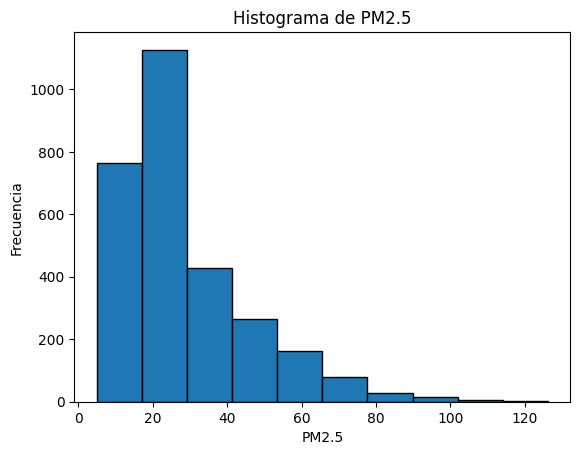

In [41]:
plt.hist(df_arreglados['PM2.5'], edgecolor='black')
plt.title('Histograma de PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frecuencia')
plt.show()

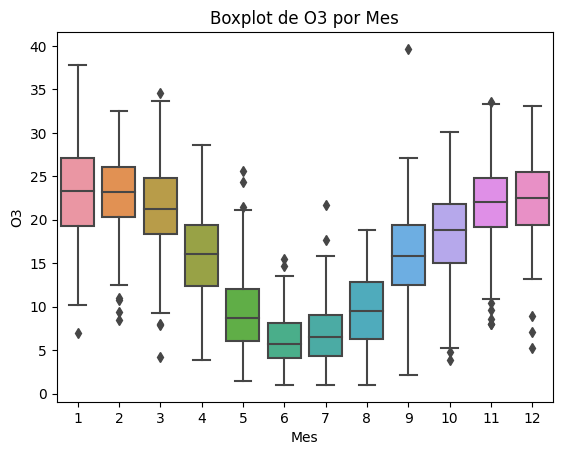

In [42]:
sns.boxplot(x='Month', y='O3', data=df_arreglados)
plt.title('Boxplot de O3 por Mes')
plt.xlabel('Mes')
plt.ylabel('O3')
plt.show()

             O3      PM2.5
Year                      
2008  16.624617  30.599163
2009  18.190083  27.881949
2010  18.168437  29.200577
2011  15.833573  31.288212
2012  15.631971  24.742286
2013  14.958796  27.431398
2014  14.807611  30.006810
2015  14.870671  32.322061
2016  21.121667  15.639444


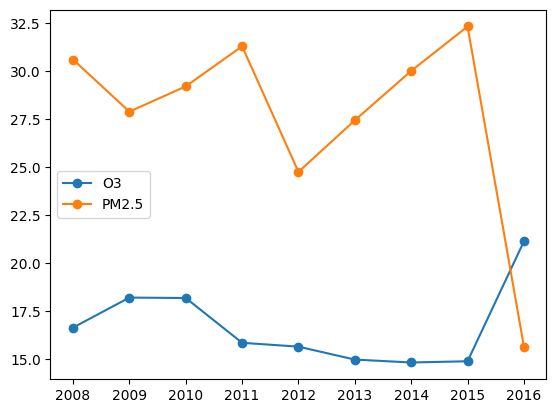

In [43]:
promedios_por_ano = df_arreglados.groupby("Year")[["O3", "PM2.5"]].mean()

print(promedios_por_ano)
plt.plot(promedios_por_ano.index, promedios_por_ano["O3"], marker='o', label="O3")
plt.plot(promedios_por_ano.index, promedios_por_ano["PM2.5"], marker='o', label="PM2.5")
plt.legend()
plt.show()

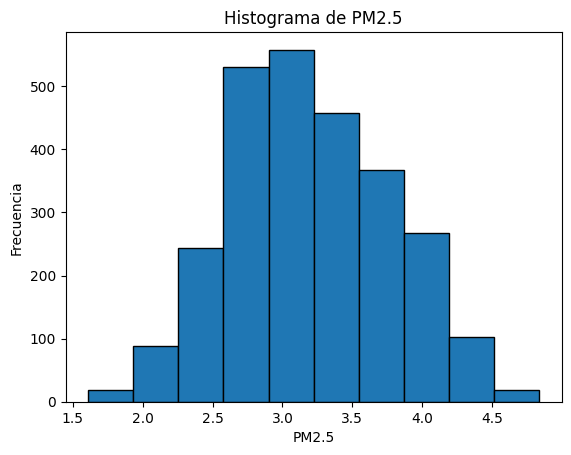

In [44]:
plt.hist(df_eliminados['PM2.5'], edgecolor='black')
plt.title('Histograma de PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frecuencia')
plt.show()

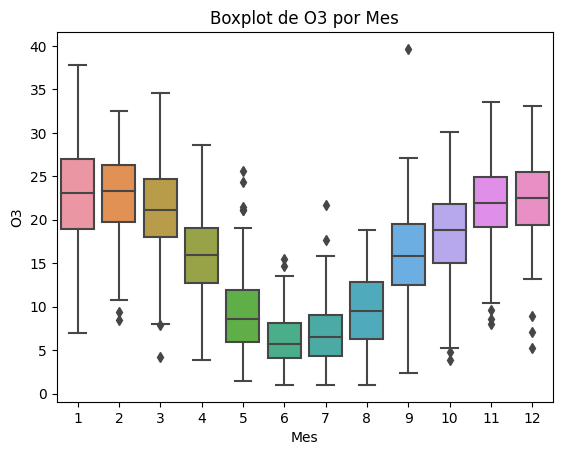

In [45]:
sns.boxplot(x='Month', y='O3', data=df_eliminados)
plt.title('Boxplot de O3 por Mes')
plt.xlabel('Mes')
plt.ylabel('O3')
plt.show()

             O3     PM2.5
Year                     
2008  14.304812  3.271499
2009  18.067059  3.185063
2010  18.108790  3.238632
2011  15.833000  3.317615
2012  15.631971  3.051845
2013  14.835705  3.194721
2014  13.928069  3.225503
2015  14.611642  3.226634
2016  21.121667  2.701500


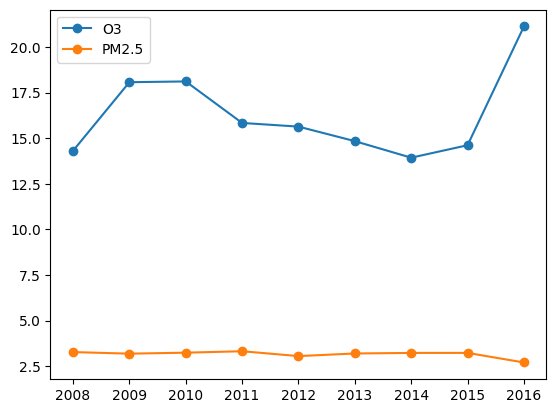

In [46]:
promedios_por_ano = df_eliminados.groupby("Year")[["O3", "PM2.5"]].mean()

print(promedios_por_ano)
plt.plot(promedios_por_ano.index, promedios_por_ano["O3"], marker='o', label="O3")
plt.plot(promedios_por_ano.index, promedios_por_ano["PM2.5"], marker='o', label="PM2.5")
plt.legend()
plt.show()

# Misión 4

In [47]:
df['Environmental_risk'].value_counts()

medio      1605
Bajo        750
nulo        134
Alto        106
extremo      61
Name: Environmental_risk, dtype: int64

In [48]:
# Implementaremos como ejemplo 4 categorías
# Extremo, alto, bajo riesgo

def calcular_riesgo(o3, pm25):
    if o3 > 22:
        if pm25 > 34:
            return "Extremo"
        return "Alto"
    elif pm25 > 32:
        return "Alto"
    elif o3 < 17 and pm25 < 22:
        return "Bajo"
    else:
        return "medio"

In [49]:
df_arreglados['Environmental_risk'] = df_arreglados.apply(lambda row : calcular_riesgo(row['O3'], row['PM2.5']) if (pd.isnull(row['Environmental_risk']) or row['Environmental_risk'] == "nulo") else row['Environmental_risk'], axis = 1)

In [50]:
df_arreglados['Environmental_risk'].value_counts()

medio      1798
Bajo        777
Alto        238
extremo      60
Name: Environmental_risk, dtype: int64

In [51]:
df_eliminados['Environmental_risk'] = df_eliminados.apply(lambda row : calcular_riesgo(row['O3'], row['PM2.5']) if (pd.isnull(row['Environmental_risk']) or row['Environmental_risk'] == "nulo") else row['Environmental_risk'], axis = 1)

<ipython-input-51-bd0e8271aa2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eliminados['Environmental_risk'] = df_eliminados.apply(lambda row : calcular_riesgo(row['O3'], row['PM2.5']) if (pd.isnull(row['Environmental_risk']) or row['Environmental_risk'] == "nulo") else row['Environmental_risk'], axis = 1)


In [52]:
df_eliminados['Environmental_risk'].value_counts()

medio      1682
Bajo        777
Alto        132
extremo      60
Name: Environmental_risk, dtype: int64